In [86]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 420, 420

train_data_dir = 'train'
validation_data_dir = 'validation'
nb_train_samples = 399
nb_validation_samples =398
epochs = 10
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
# model.add(Dense(3))
model.add(Activation('sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


train_datagen = ImageDataGenerator(
    rescale=1. / 420)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 420)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 418, 418, 32)      896       
_________________________________________________________________
activation_46 (Activation)   (None, 418, 418, 32)      0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 209, 209, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 207, 207, 32)      9248      
_________________________________________________________________
activation_47 (Activation)   (None, 207, 207, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 103, 103, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 101, 101, 64)      18496     
__________

In [87]:

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


model.save_weights('first_try.h5')

Epoch 1/10
12/12 [==============================] - 103s 9s/step - loss: 1.3634 - acc: 0.5026 - val_loss: 0.6920 - val_acc: 0.5000
Epoch 2/10
12/12 [==============================] - 49s 4s/step - loss: 0.6940 - acc: 0.5316 - val_loss: 0.6805 - val_acc: 0.5000
Epoch 3/10
12/12 [==============================] - 50s 4s/step - loss: 0.8741 - acc: 0.5995 - val_loss: 1.9858 - val_acc: 0.4973
Epoch 4/10
12/12 [==============================] - 50s 4s/step - loss: 0.8003 - acc: 0.6731 - val_loss: 0.5322 - val_acc: 0.8525
Epoch 5/10
12/12 [==============================] - 50s 4s/step - loss: 0.4256 - acc: 0.8273 - val_loss: 0.2857 - val_acc: 0.8962
Epoch 6/10
12/12 [==============================] - 49s 4s/step - loss: 0.4758 - acc: 0.7825 - val_loss: 0.1380 - val_acc: 0.9536
Epoch 7/10
12/12 [==============================] - 50s 4s/step - loss: 0.2250 - acc: 0.9110 - val_loss: 0.1214 - val_acc: 0.9617
Epoch 8/10
12/12 [==============================] - 49s 4s/step - loss: 0.0821 - acc: 0.9

In [6]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
# load model
img_width, img_height = 420, 420

train_data_dir = 'train'
validation_data_dir = 'validation'
nb_train_samples = 1000
nb_validation_samples = 400
epochs = 100
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Dense(1))
# model.add(Dense(3))
model.add(Activation('sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.load_weights('first_try.h5')

test_dir = 'validation'
test_datagen = ImageDataGenerator(rescale=1./img_width)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_width, img_width),
        color_mode="rgb",
        shuffle = False,
        class_mode='binary',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = nb_samples)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 418, 418, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 418, 418, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 209, 209, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 207, 207, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 207, 207, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 103, 103, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 101, 101, 64)      18496     
__________

In [8]:
# detection 
test_dir = 'test'
test_datagen = ImageDataGenerator(rescale=1./img_width)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_width, img_width),
        color_mode="rgb",
        shuffle = False,
        class_mode='binary',
        batch_size=1)


filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = nb_samples)


Found 3110 images belonging to 1 classes.


In [9]:
predict2=[]
for a in predict:
    predict2.append(float(a.round(3)))

In [17]:
import numpy as np
import pandas as pd

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predict2})
results.to_csv("resultsForex.csv",index=False)


In [10]:
import pandas as pd
donnee=pd.read_csv('resultsForex.csv')

In [11]:
print(donnee.head())

                                 Filename  Predictions
0  negatif\2017-07-02H19_graph_30_day.png        0.000
1  negatif\2017-07-02H20_graph_30_day.png        0.001
2  negatif\2017-07-02H21_graph_30_day.png        0.000
3  negatif\2017-07-02H22_graph_30_day.png        0.001
4  negatif\2017-07-02H23_graph_30_day.png        0.001


In [12]:
# print(donnee)
for i in range(0,len(donnee.Filename)):
    donnee.iloc[i,0]=donnee.iloc[i,0].split('\\')[1].split('_')[0]


In [13]:
print(donnee.head())

        Filename  Predictions
0  2017-07-02H19        0.000
1  2017-07-02H20        0.001
2  2017-07-02H21        0.000
3  2017-07-02H22        0.001
4  2017-07-02H23        0.001


In [14]:
date_bonne=[]
j=0
while (j < len(donnee.Filename)):
    if donnee.iloc[j,1]==1:
        date_bonne.append(donnee.iloc[j,0])
        if ((len(donnee.Filename)-j)< 30):
#             print(donnee.iloc[(j),0])
            date_bonne.append(donnee.iloc[(j),0])
            j=len(donnee.Filename)
            break
        else:
            j=j+30
            date_bonne.append(donnee.iloc[(j),0])
    j=j+1
    

print(date_bonne)

['2017-09-28H16', '2017-09-29H2', '2017-11-08H15', '2017-11-09H20']


In [15]:
a=0
lst_dict = []
while (a < len(date_bonne)):
    lst_dict.append({'x0':date_bonne[a],'x1':date_bonne[a+1],'opacity':0.2, 'type':'rect','fillcolor':'#d3d3d3', 'y0':0, 'y1':1, 'xref':'x', 'yref':'paper','line_width':1})
    a=a+2
print(lst_dict)

[{'x0': '2017-09-28H16', 'x1': '2017-09-29H2', 'opacity': 0.2, 'type': 'rect', 'fillcolor': '#d3d3d3', 'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper', 'line_width': 1}, {'x0': '2017-11-08H15', 'x1': '2017-11-09H20', 'opacity': 0.2, 'type': 'rect', 'fillcolor': '#d3d3d3', 'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper', 'line_width': 1}]


2017-09-28H16
Populating the interactive namespace from numpy and matplotlib


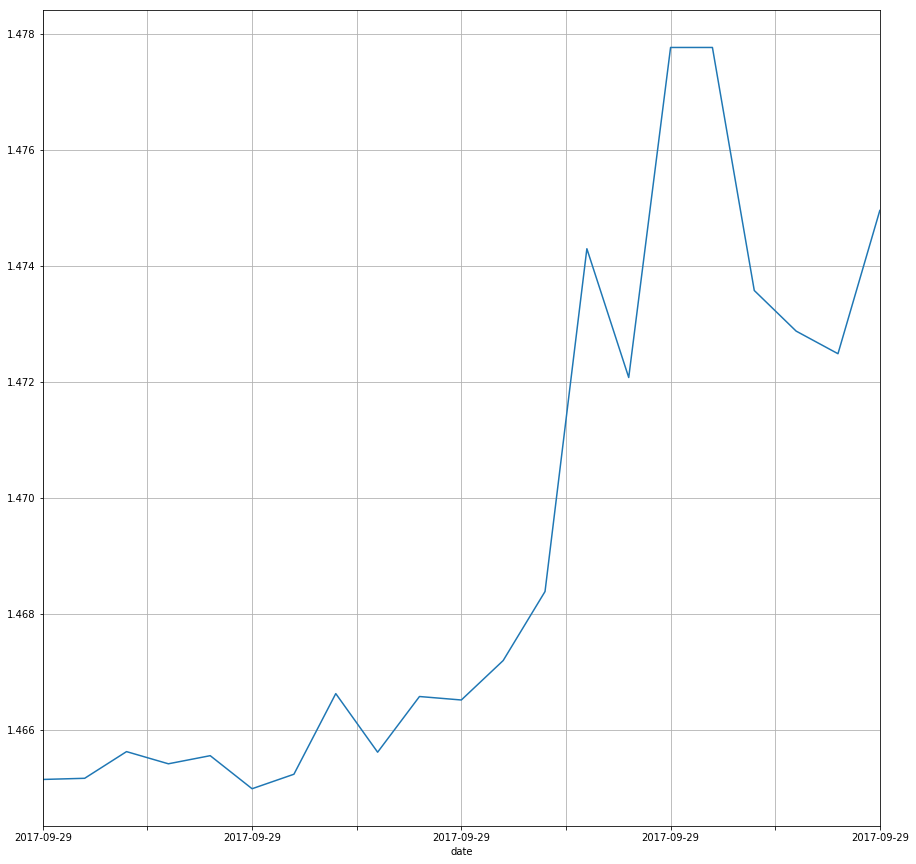

2017-11-08H15
Populating the interactive namespace from numpy and matplotlib


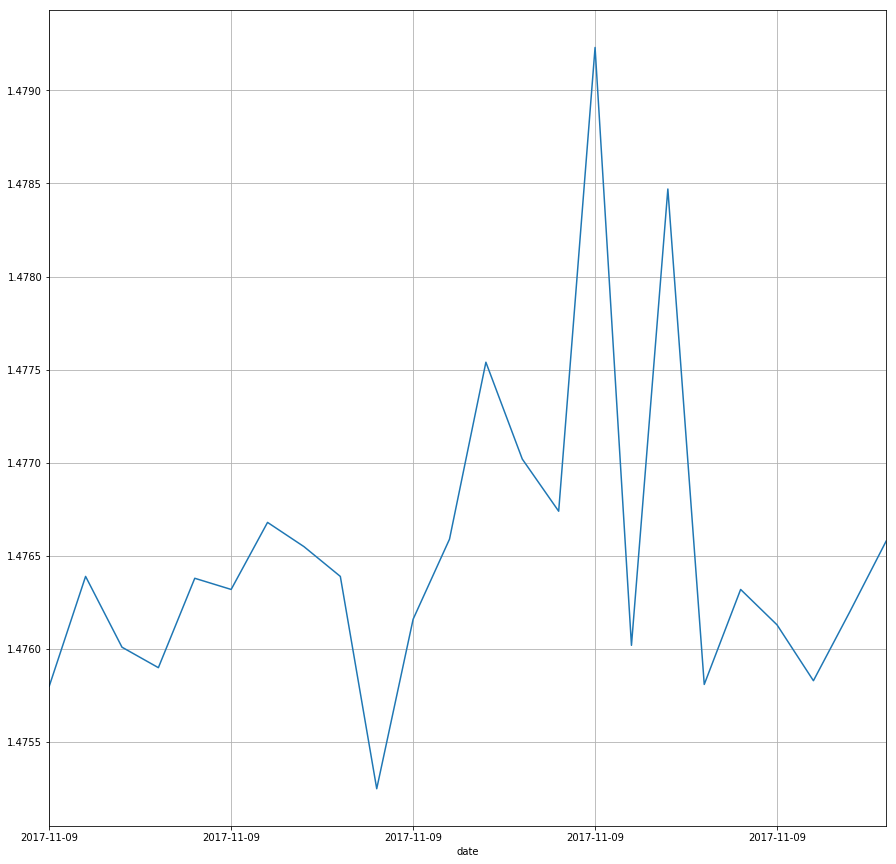

In [18]:
################AAAAD PLOT CANDLESTICK
















# nombre_observation=bitcoin.shape[0]-30
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt   # Import matplotlib

donnee2=pd.read_csv('C:/Users/Antoine/Documents/FLASK/projet/EUR_CAD.csv')

donnee2=donnee2.set_index('date')
# print(bitcoin.head())
a=0
while (a < len(date_bonne)):
    print(date_bonne[a])
    donnee_version=donnee2.loc[(donnee2.index >= date_bonne[a]) & (donnee2.index<= date_bonne[(a+1)])]
    # for i in range(nombre_observation):
    # bitcoin_version=bitcoin.iloc[i:i+30,]

    %matplotlib inline
    # Control the default size of figures in this Jupyter notebook
    %pylab inline
    pylab.rcParams['figure.figsize'] = (15, 15)   # Change the size of plots
    donnee_version["openbid"].plot(grid = True) # P
    plt.show()
    a=a+2
#     plt.savefig(names,dpi=28)
#     plt.savefig(names)



2017-09-28
16
(3140, 13)
Populating the interactive namespace from numpy and matplotlib


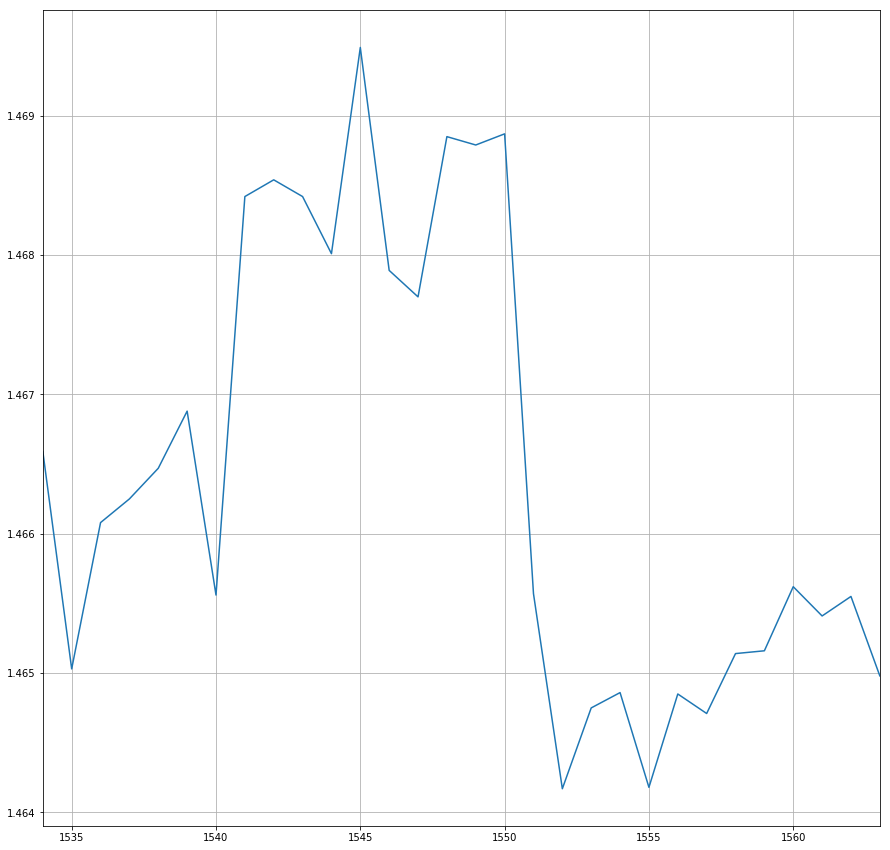

Populating the interactive namespace from numpy and matplotlib


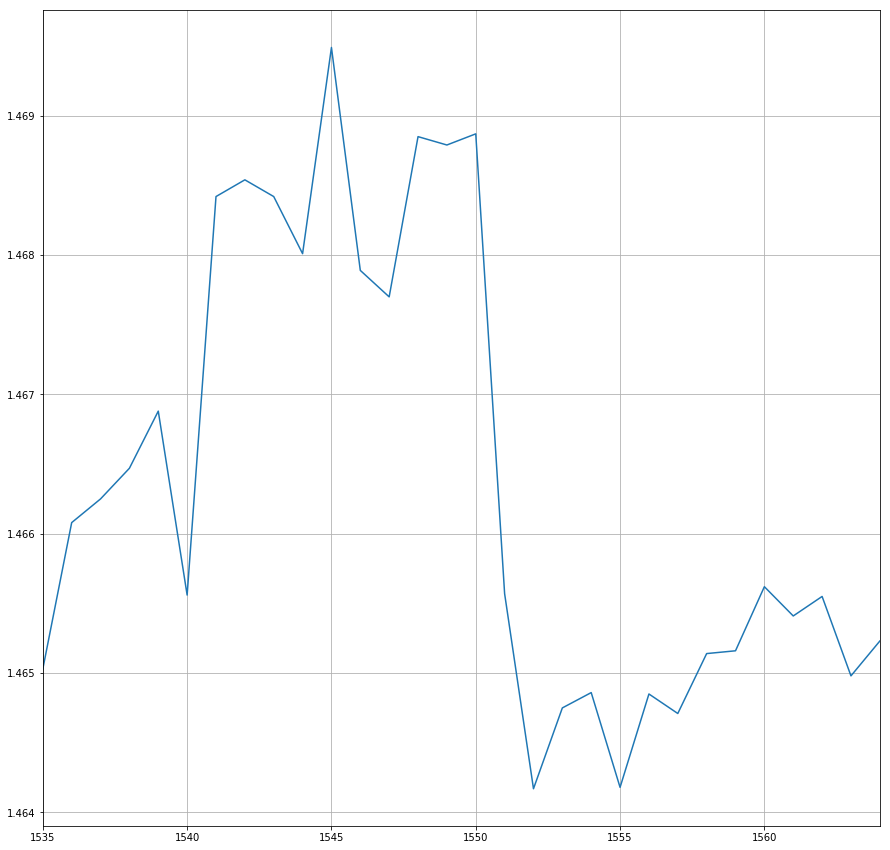

Populating the interactive namespace from numpy and matplotlib


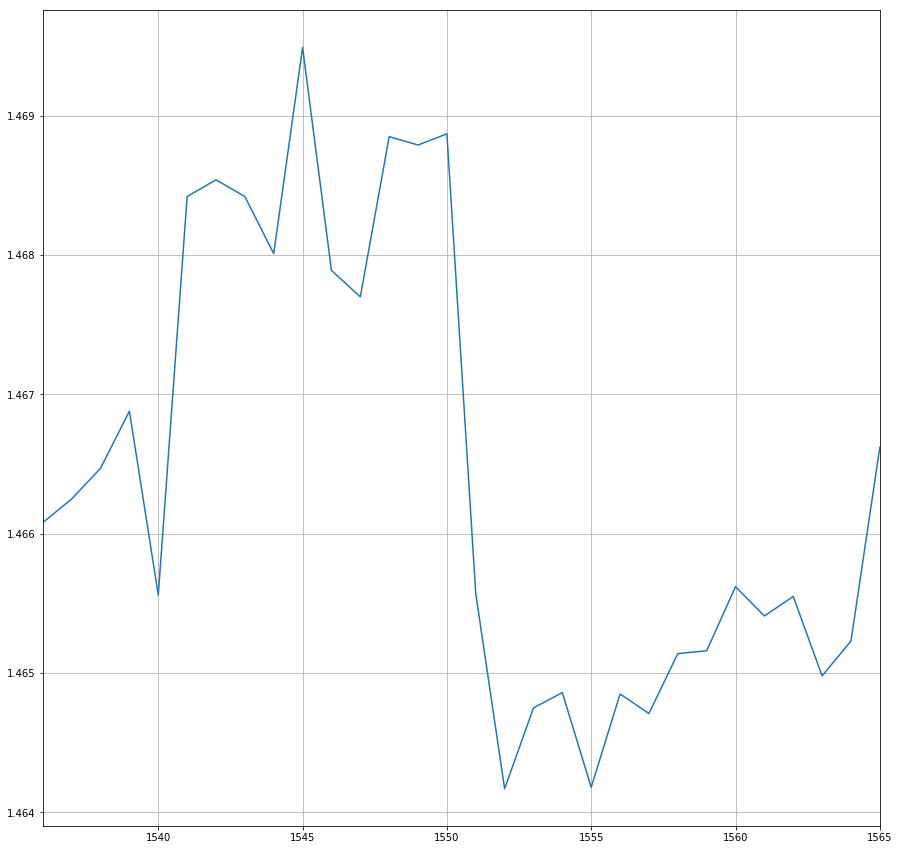

Populating the interactive namespace from numpy and matplotlib


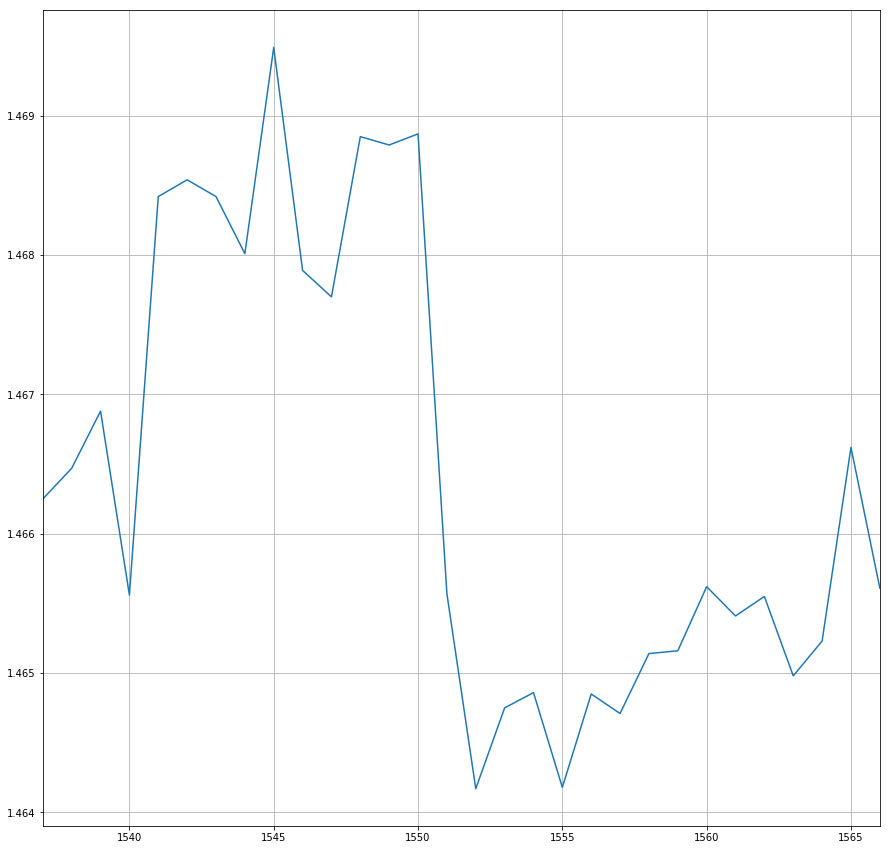

Populating the interactive namespace from numpy and matplotlib


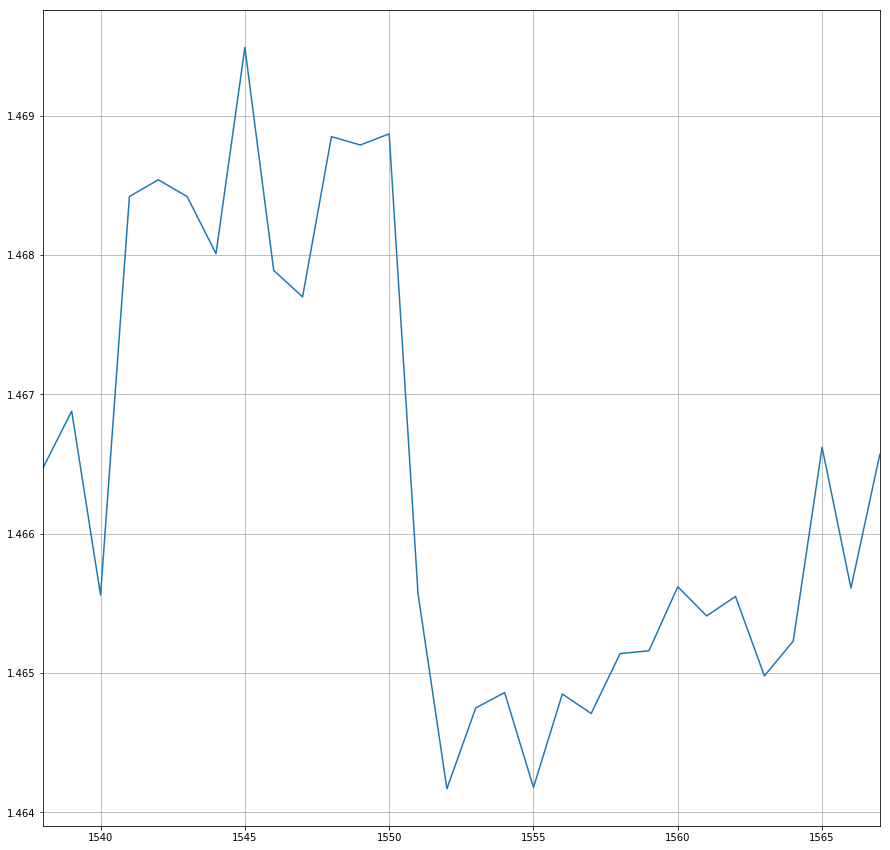

Populating the interactive namespace from numpy and matplotlib


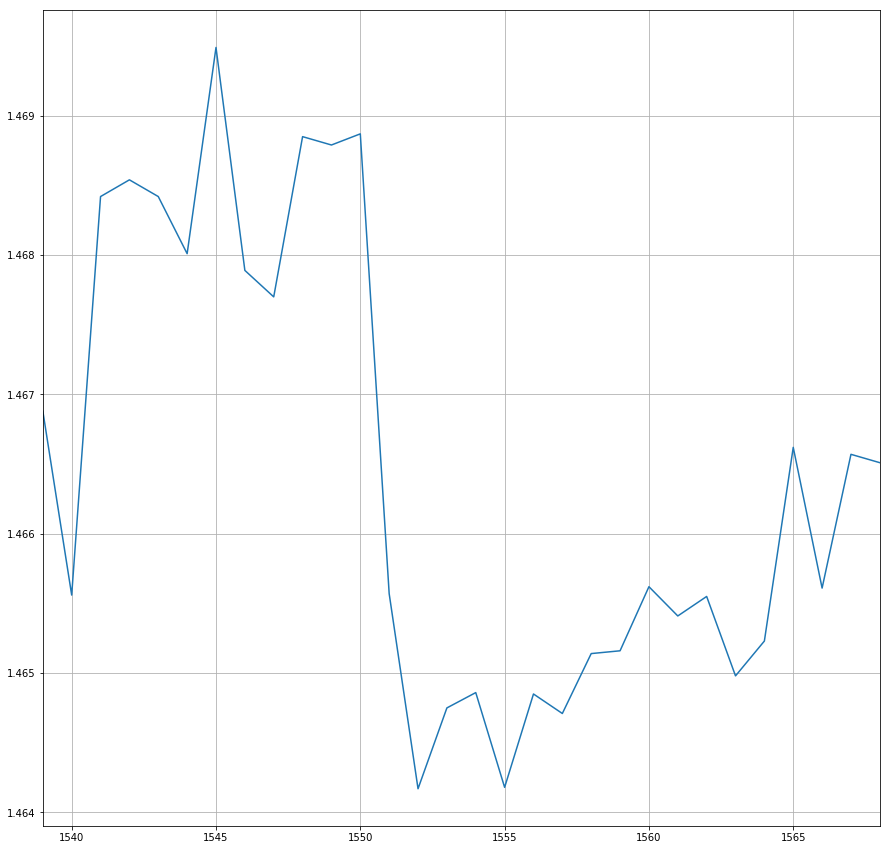

Populating the interactive namespace from numpy and matplotlib


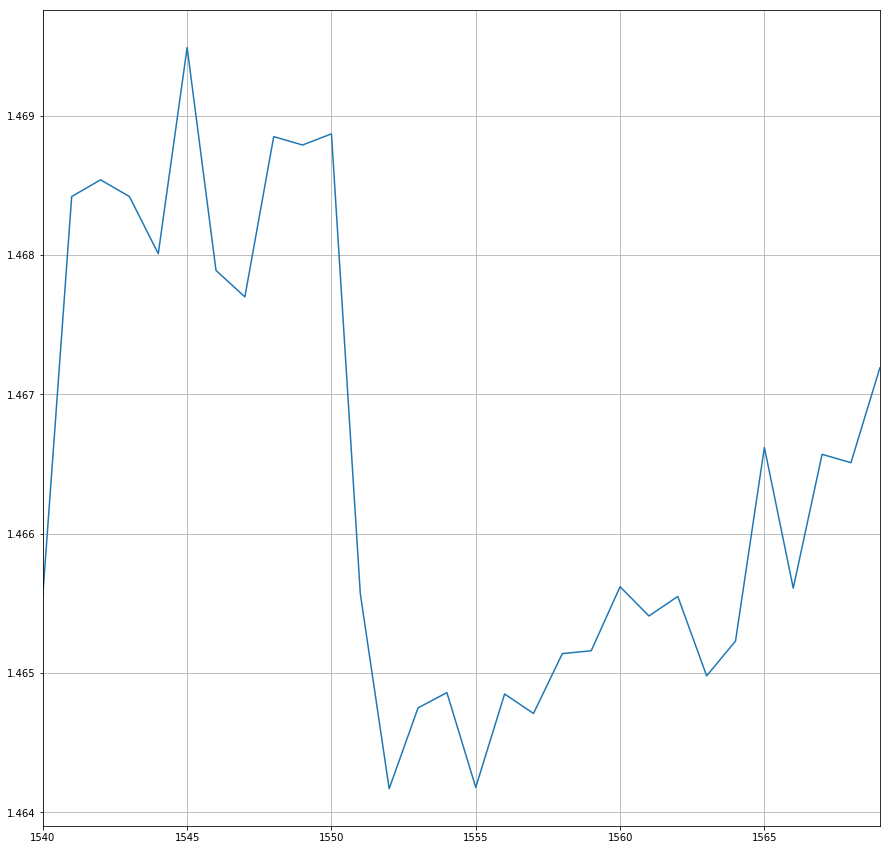

Populating the interactive namespace from numpy and matplotlib


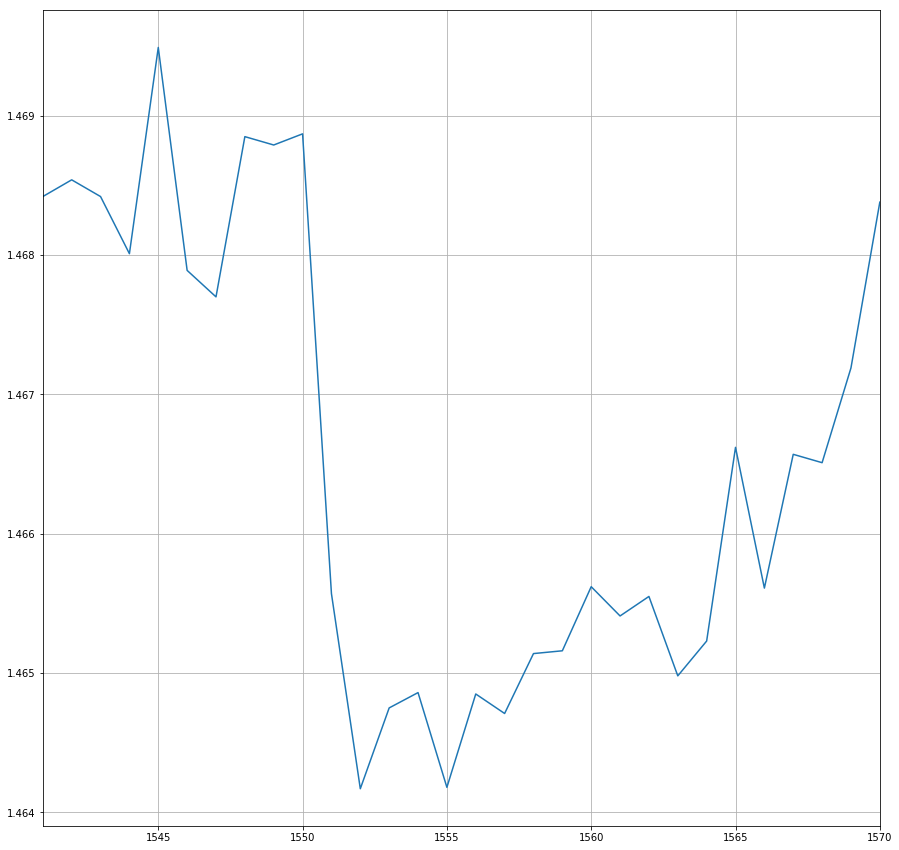

Populating the interactive namespace from numpy and matplotlib


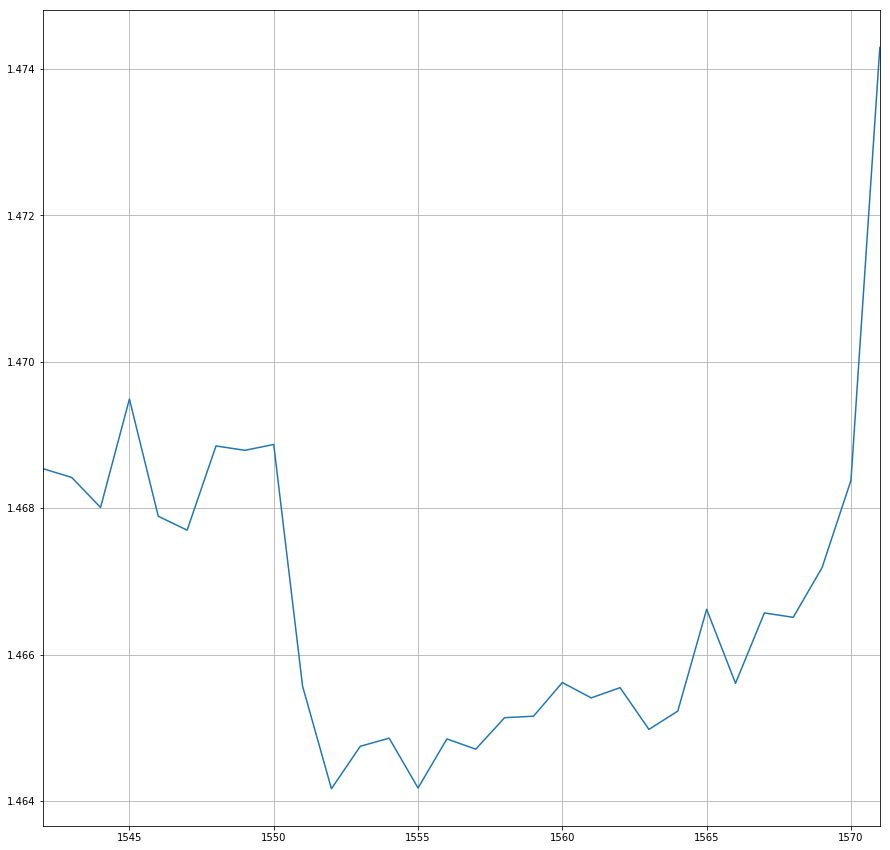

Populating the interactive namespace from numpy and matplotlib


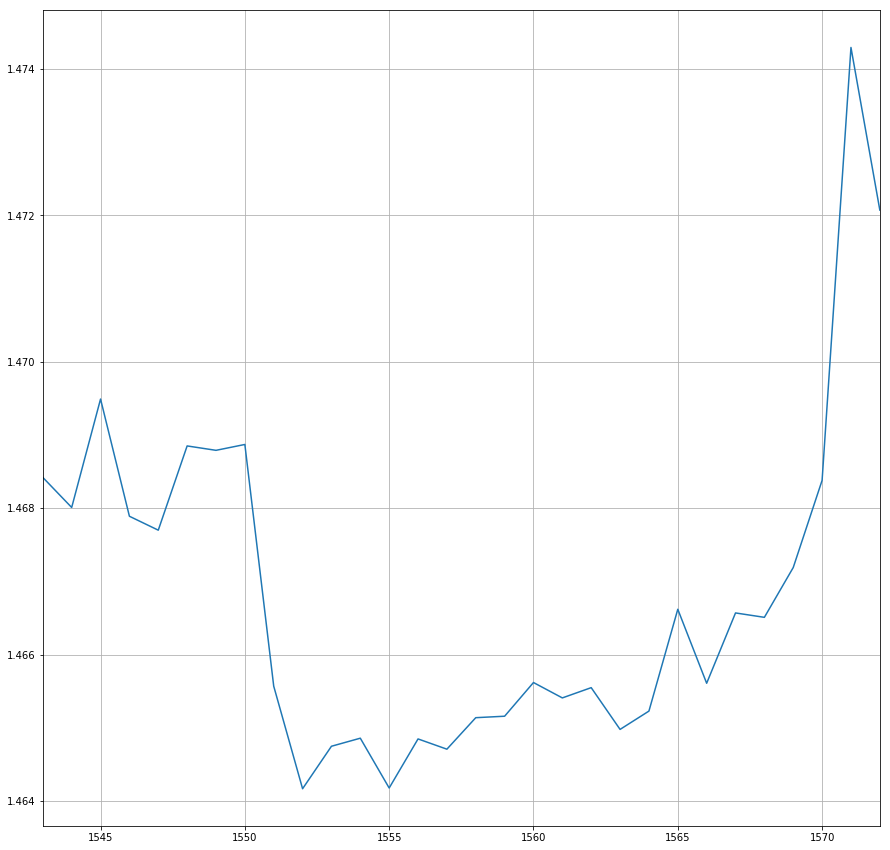

Populating the interactive namespace from numpy and matplotlib


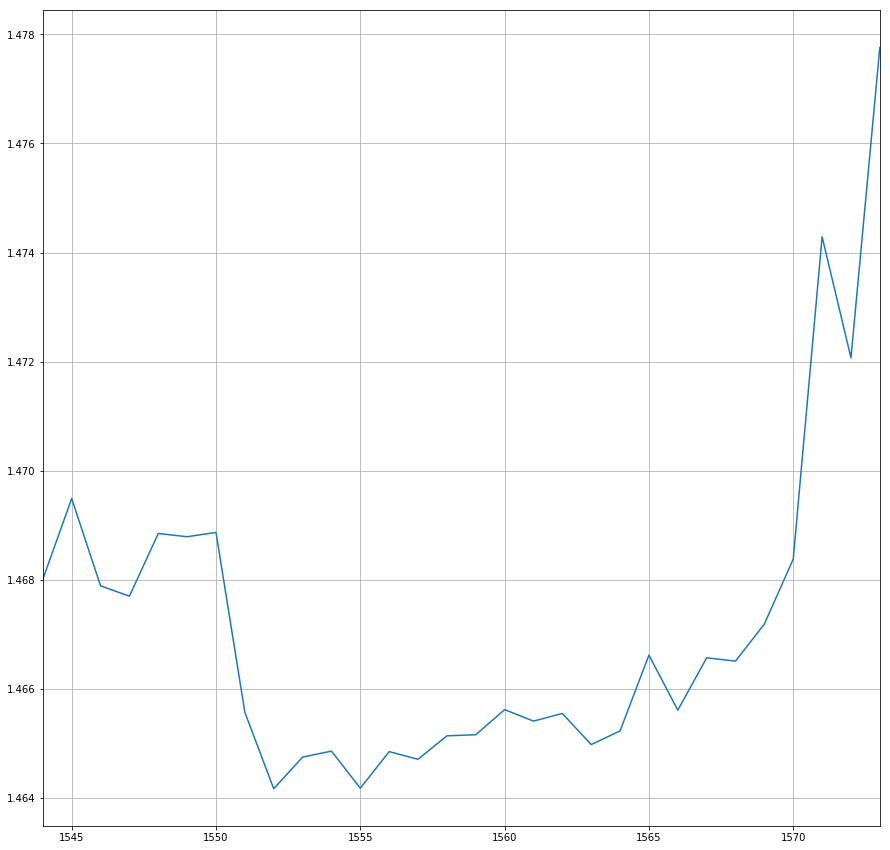

Populating the interactive namespace from numpy and matplotlib


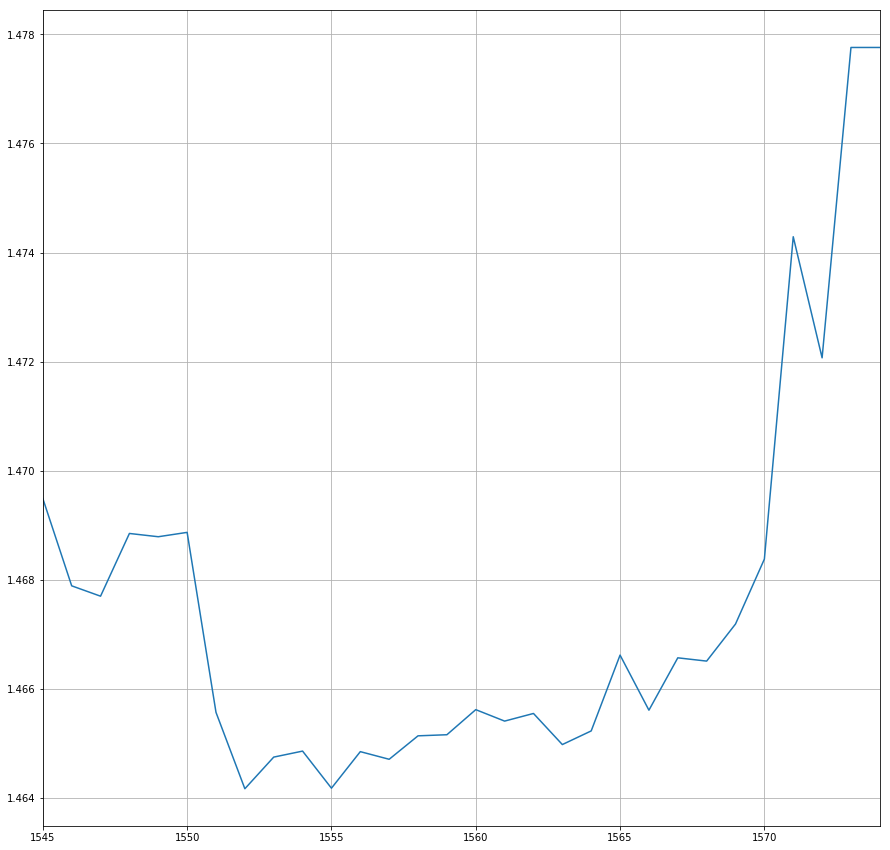

Populating the interactive namespace from numpy and matplotlib


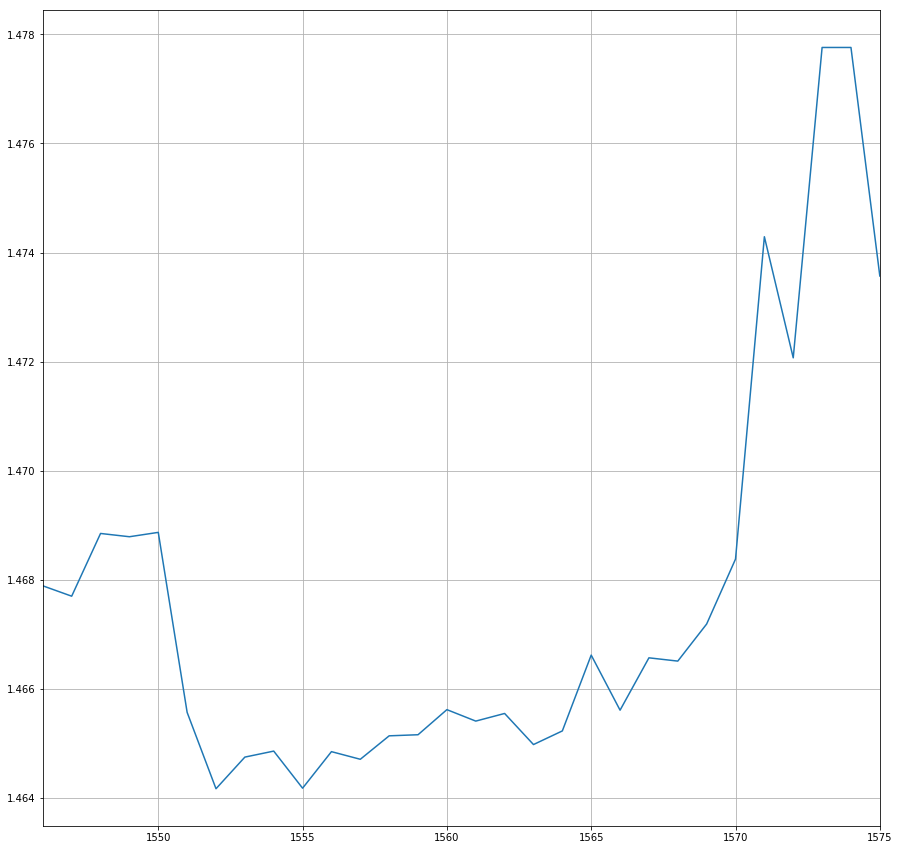

Populating the interactive namespace from numpy and matplotlib


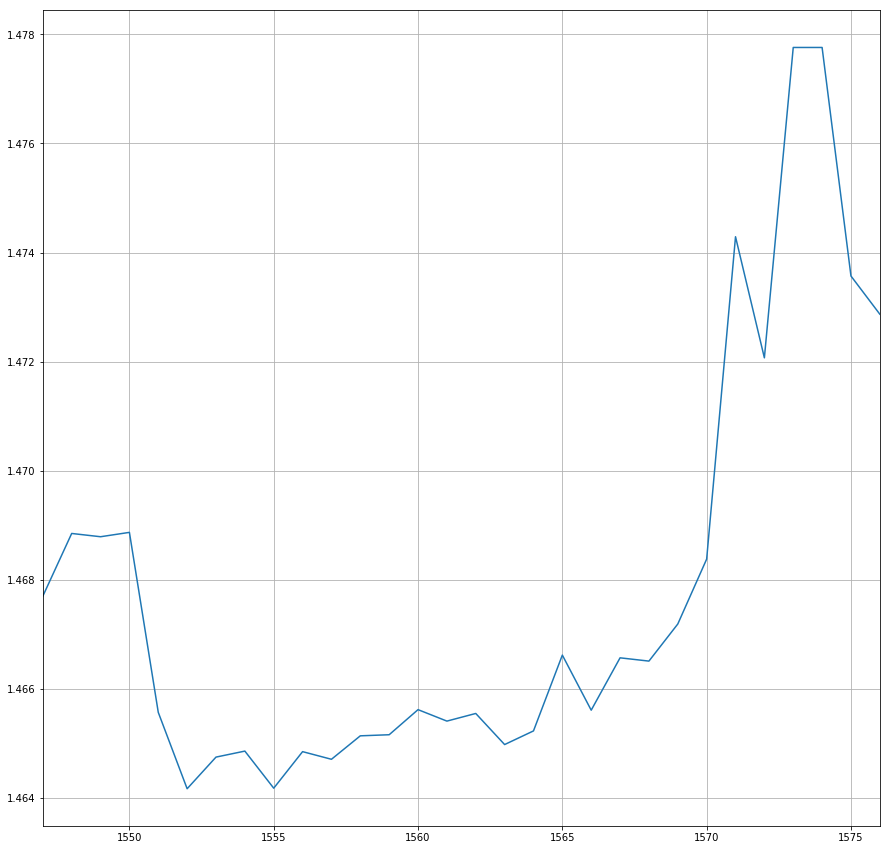

Populating the interactive namespace from numpy and matplotlib


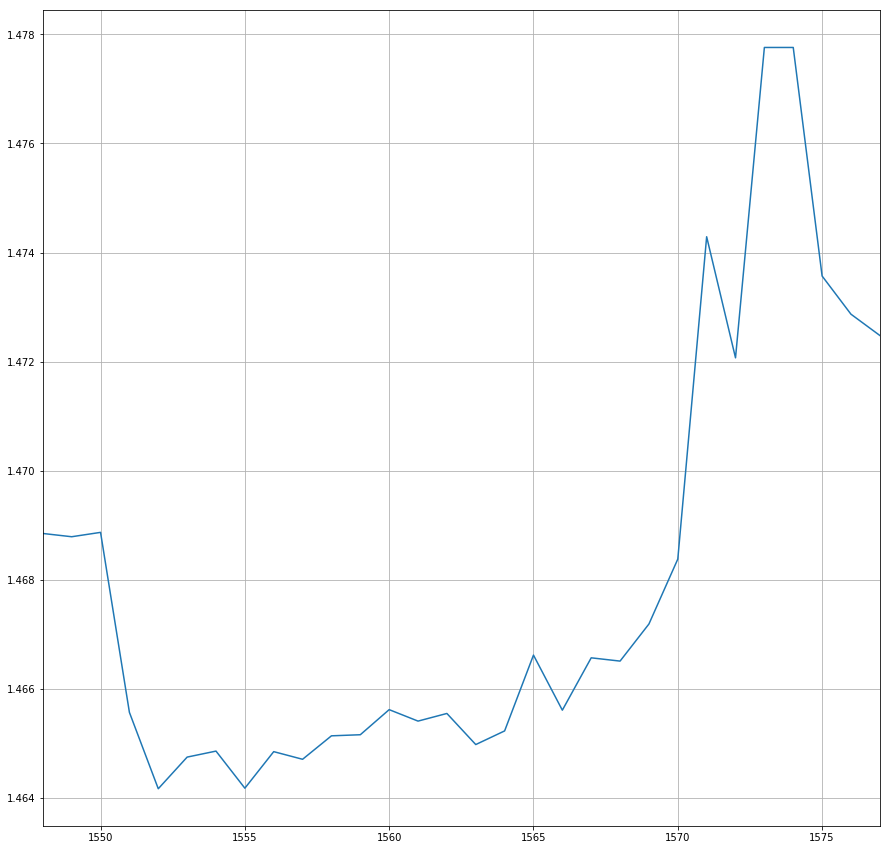

Populating the interactive namespace from numpy and matplotlib


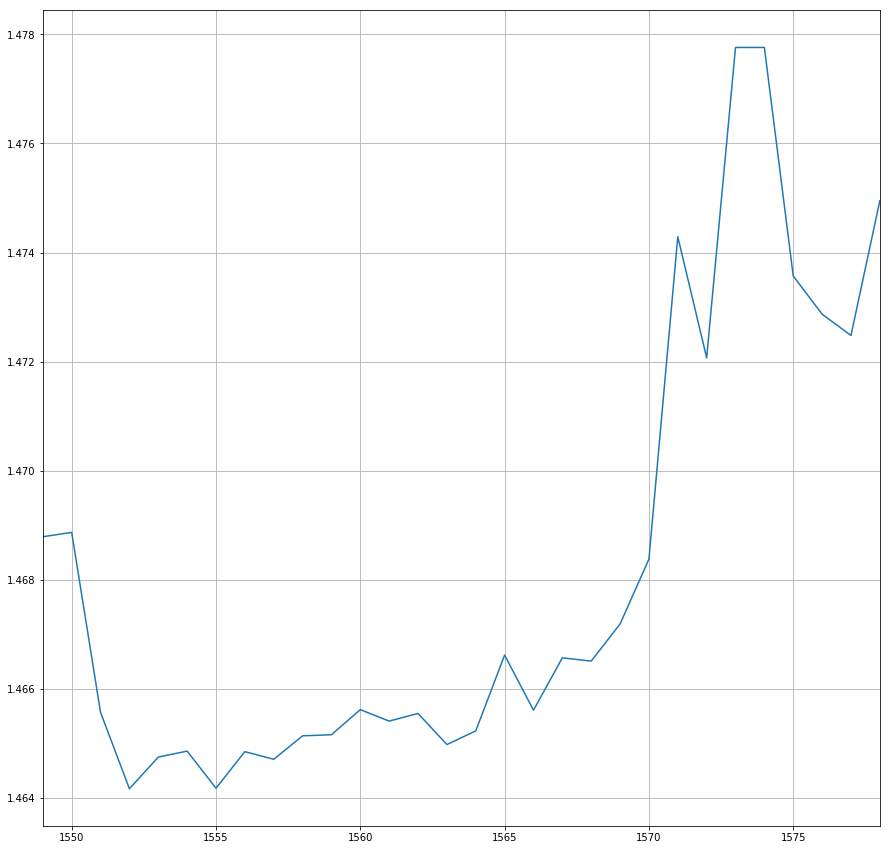

Populating the interactive namespace from numpy and matplotlib


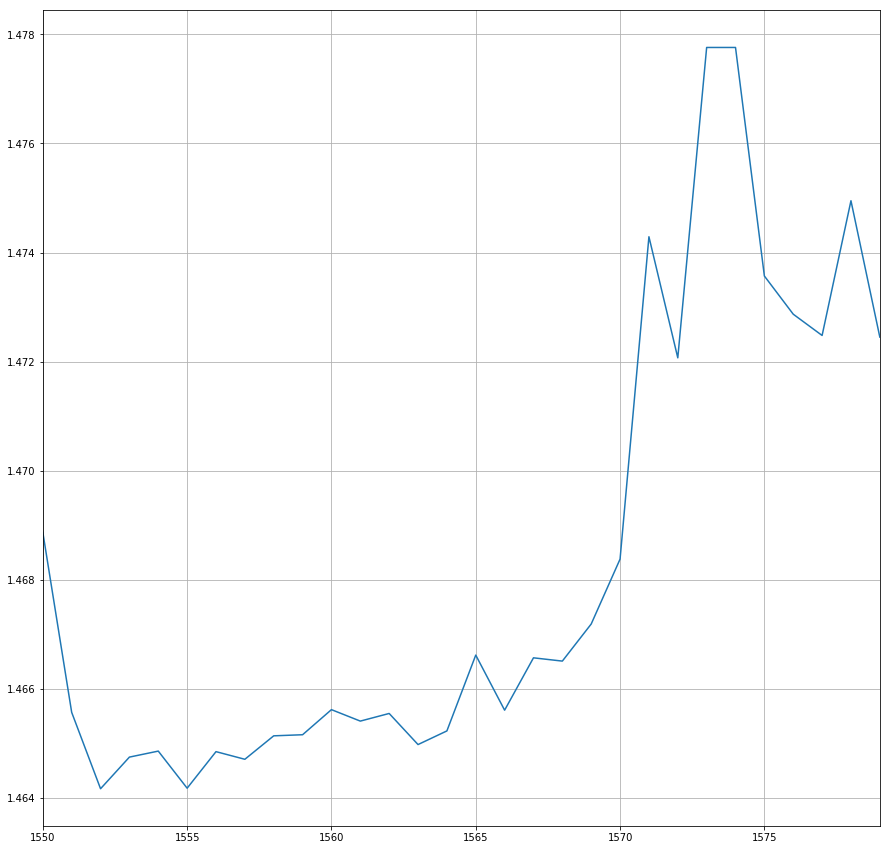

Populating the interactive namespace from numpy and matplotlib


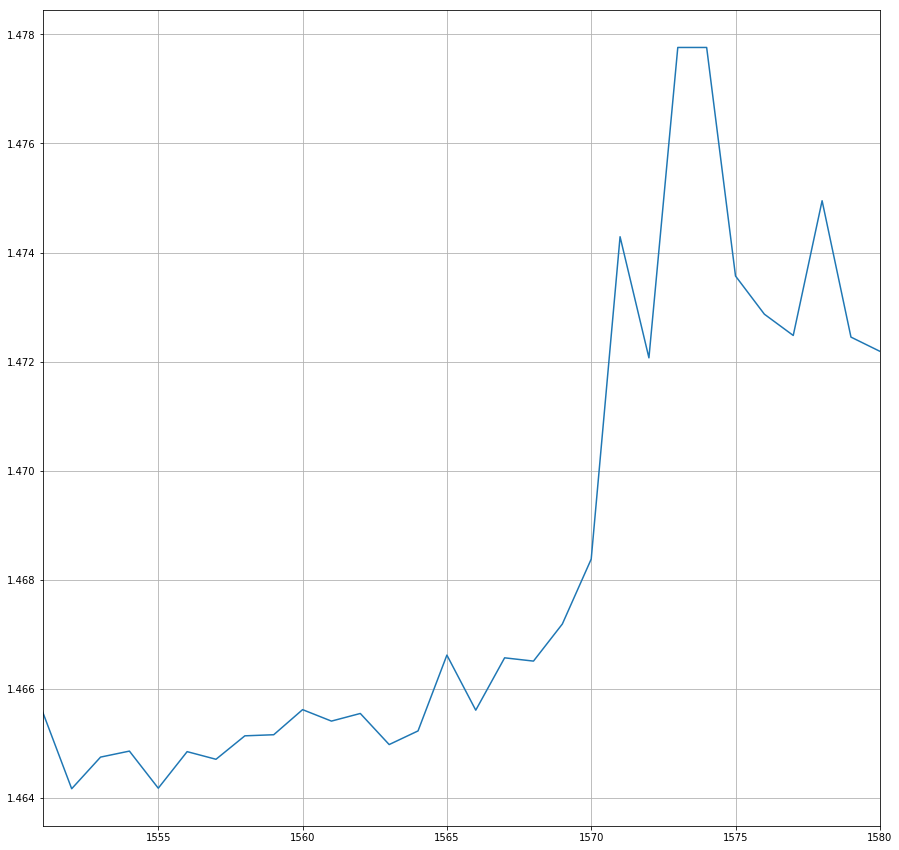

Populating the interactive namespace from numpy and matplotlib


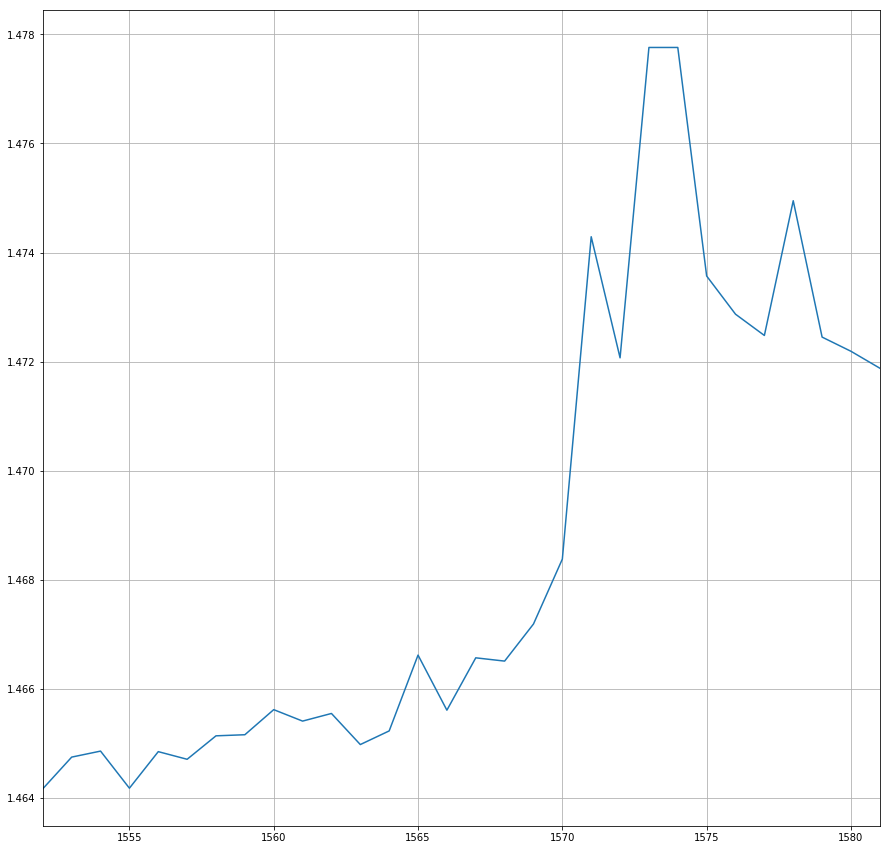

Populating the interactive namespace from numpy and matplotlib


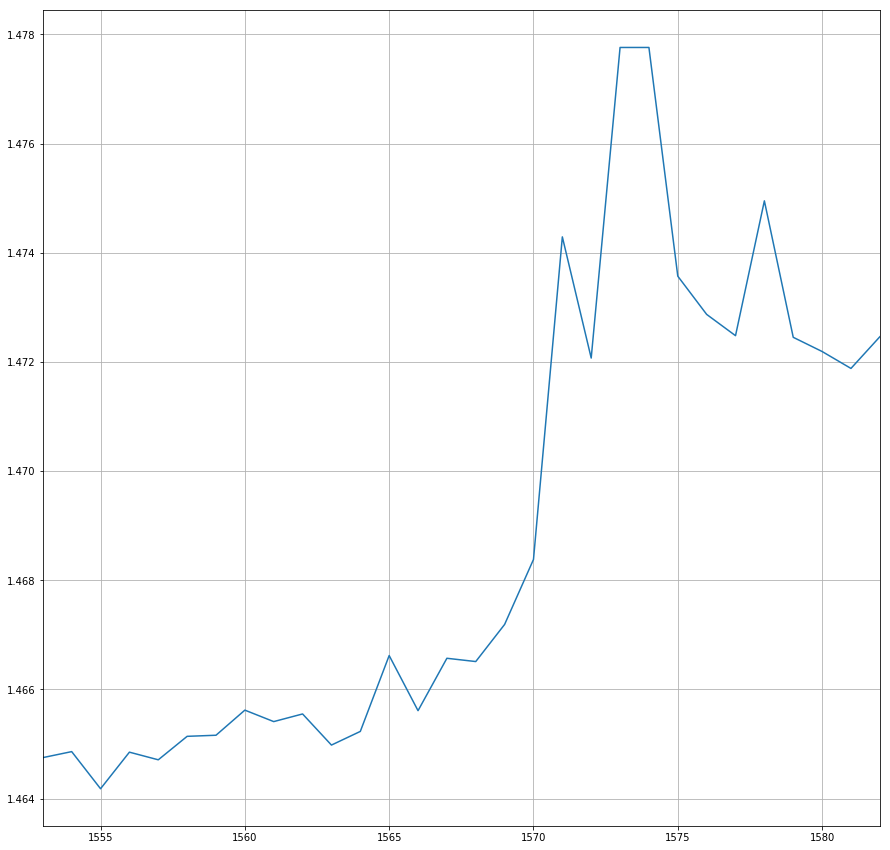

Populating the interactive namespace from numpy and matplotlib


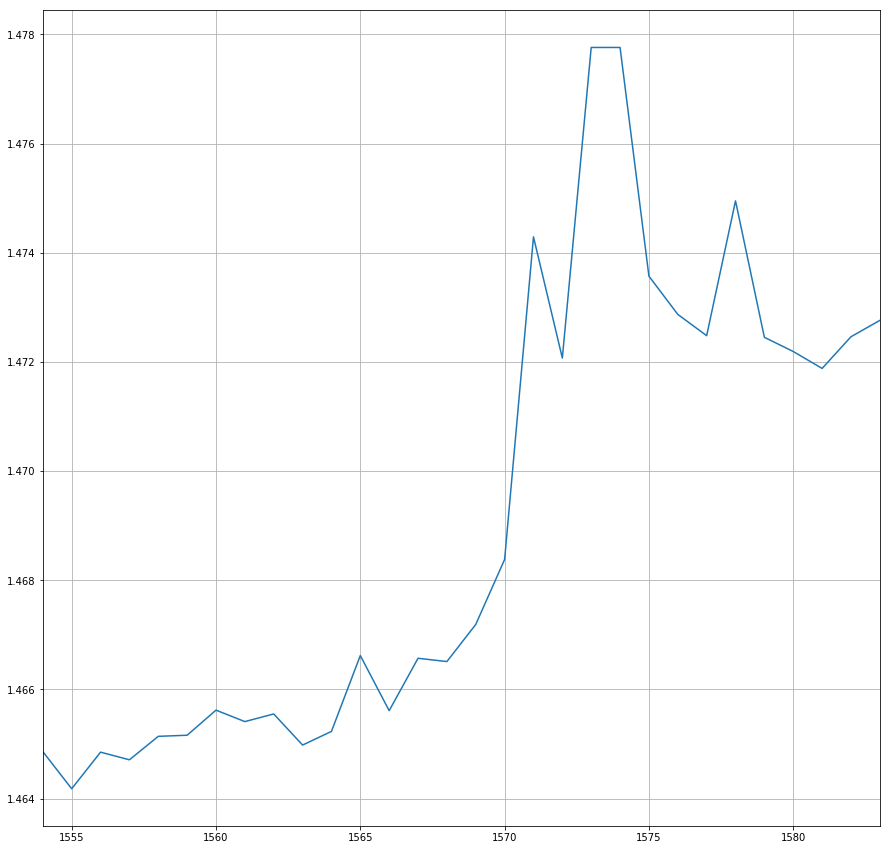

Populating the interactive namespace from numpy and matplotlib


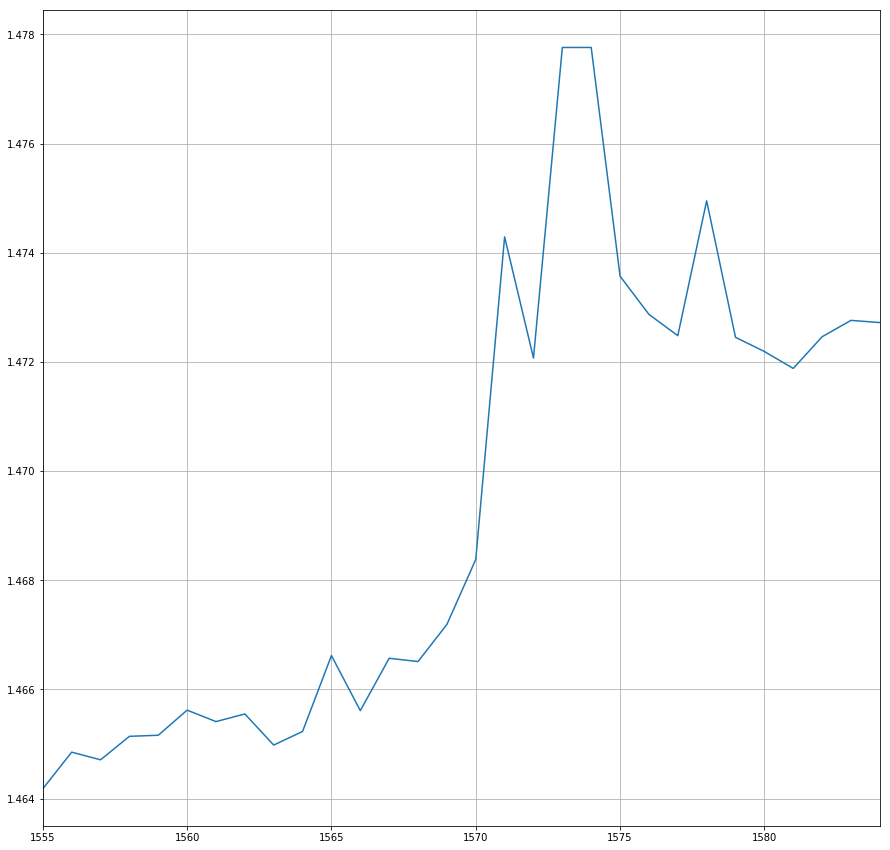

Populating the interactive namespace from numpy and matplotlib


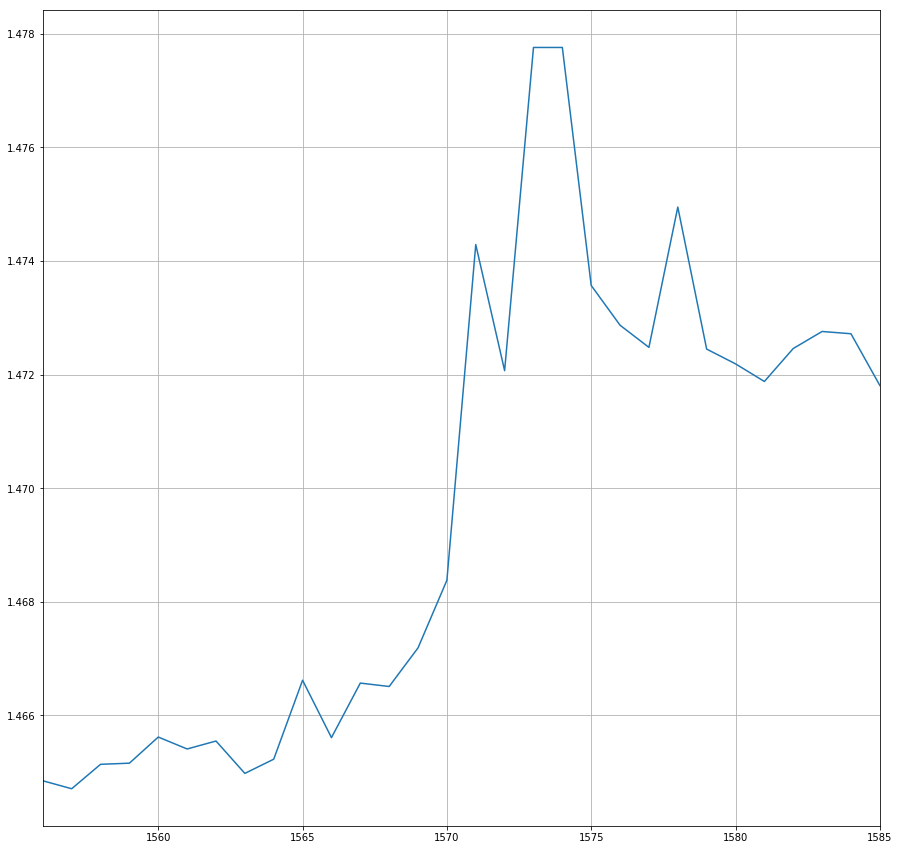

Populating the interactive namespace from numpy and matplotlib


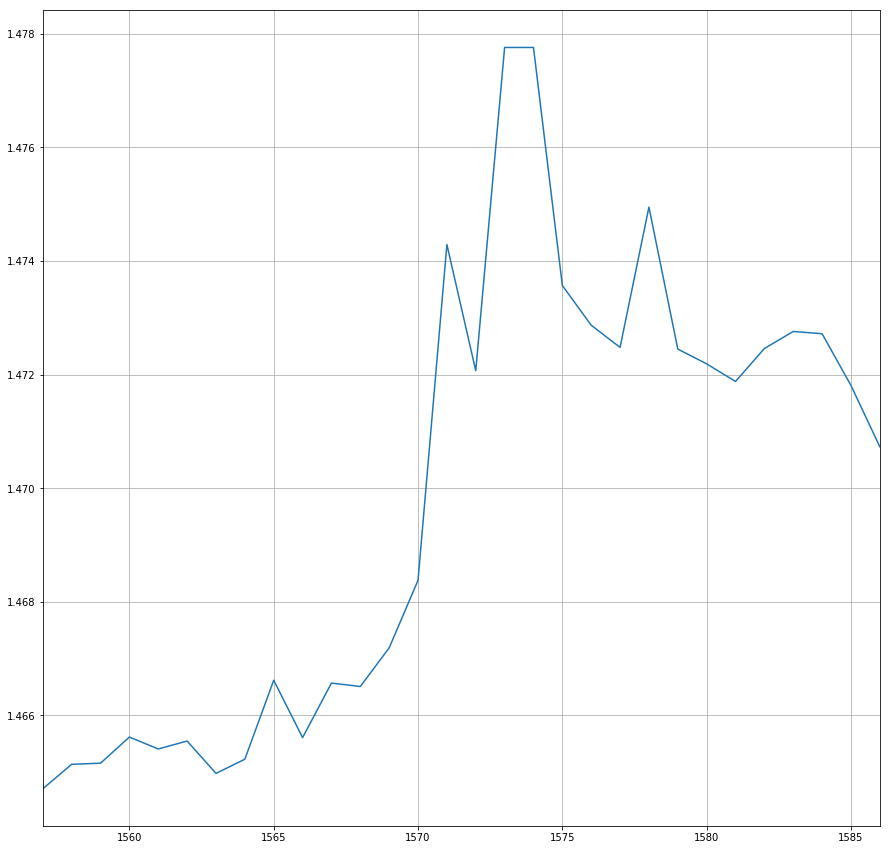

Populating the interactive namespace from numpy and matplotlib


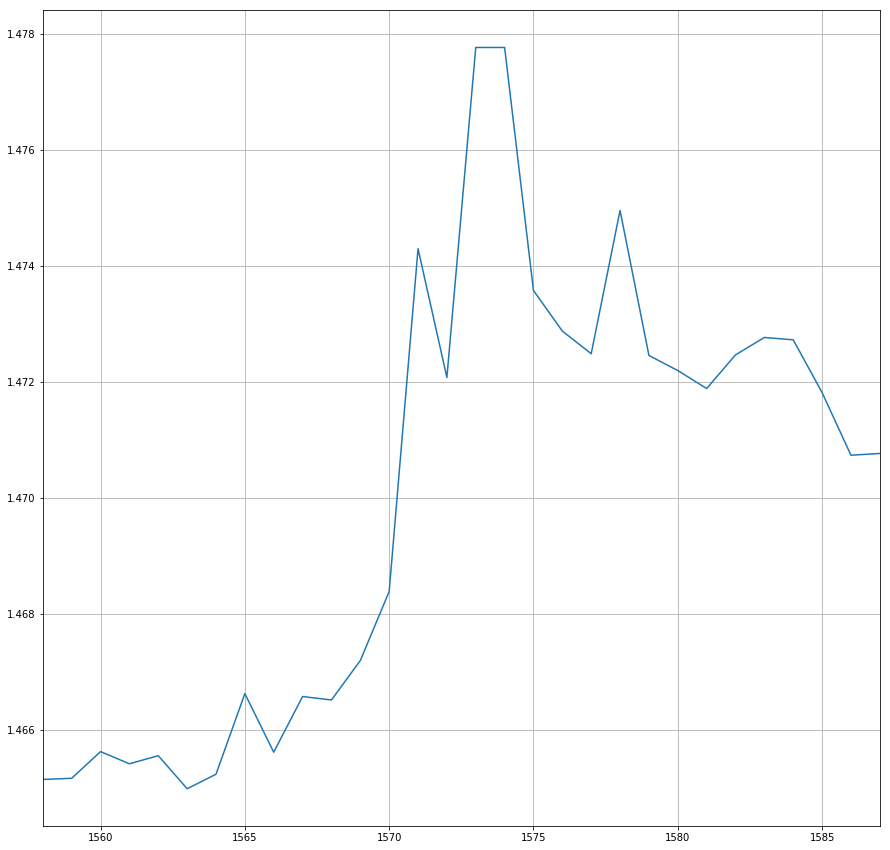

Populating the interactive namespace from numpy and matplotlib


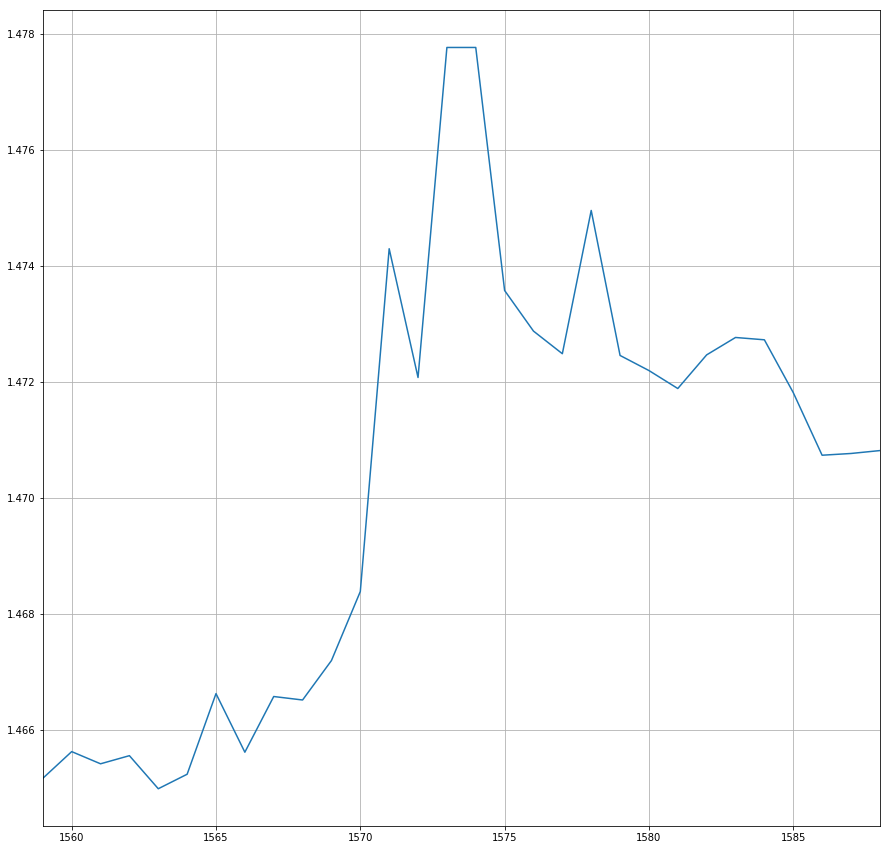

Populating the interactive namespace from numpy and matplotlib


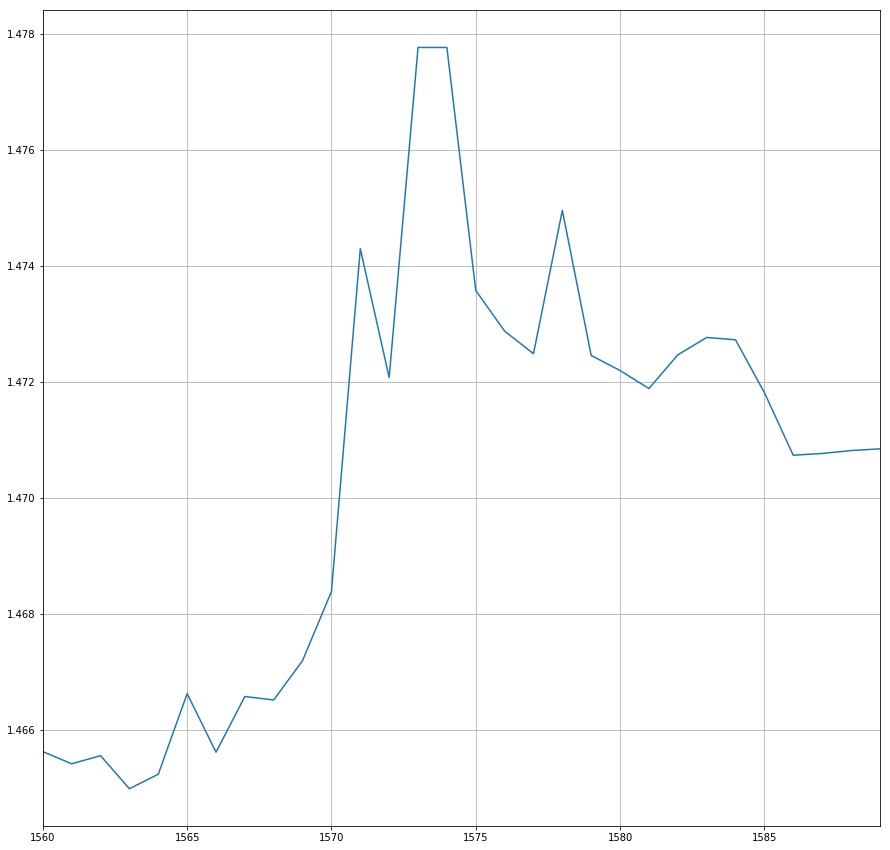

Populating the interactive namespace from numpy and matplotlib


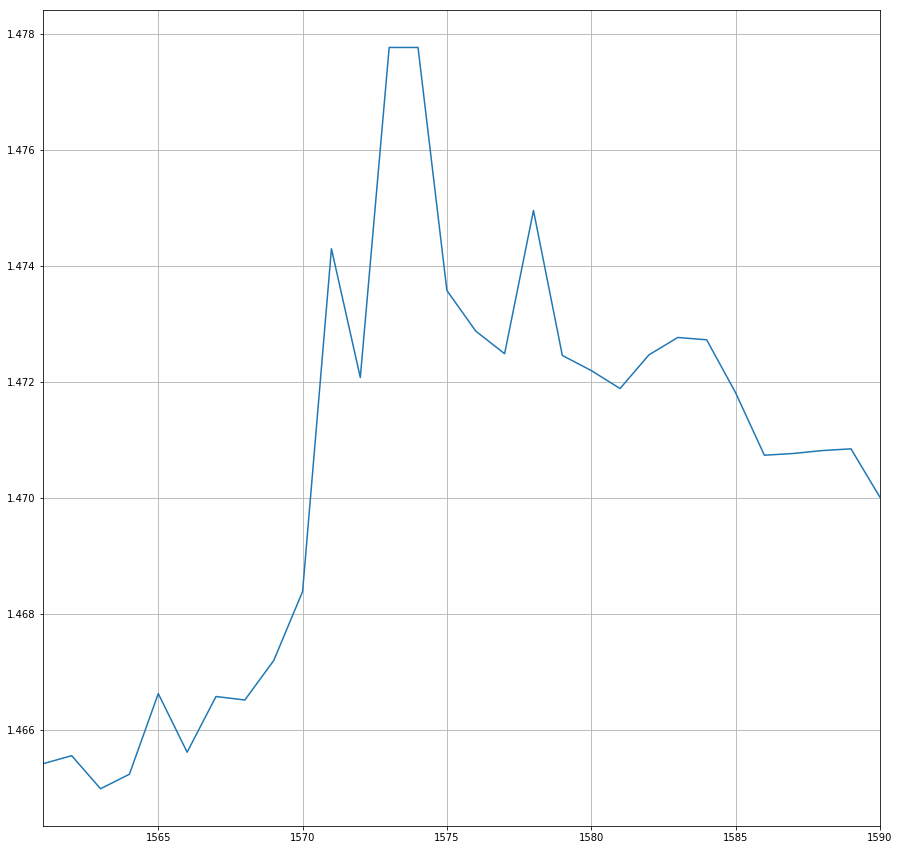

Populating the interactive namespace from numpy and matplotlib


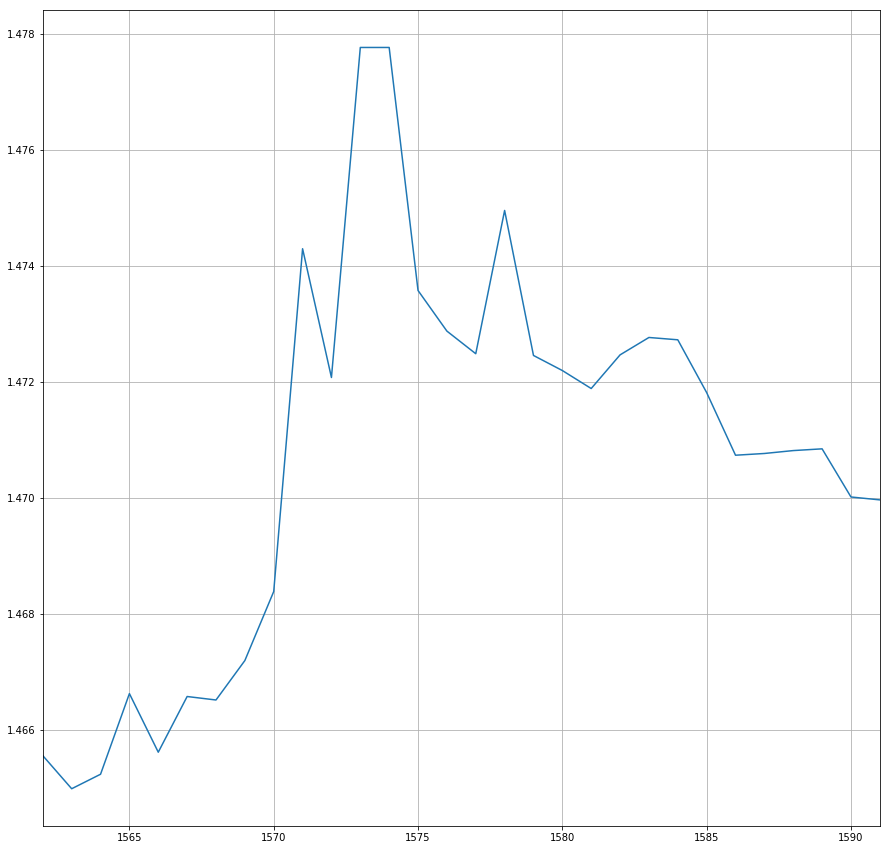

Populating the interactive namespace from numpy and matplotlib


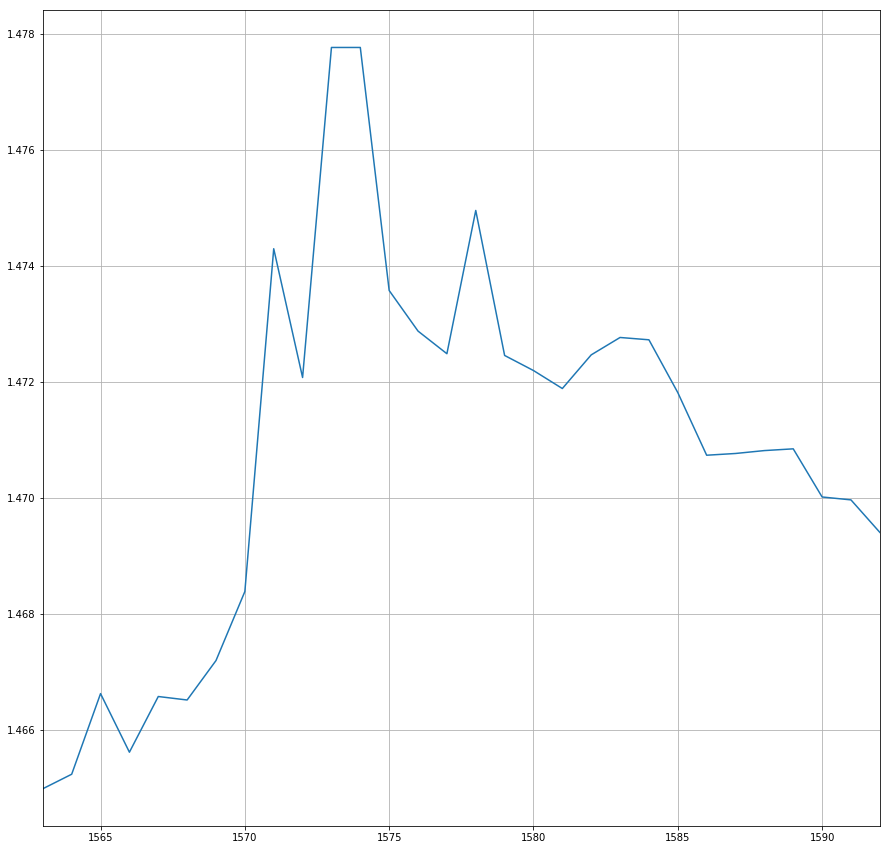

In [80]:
# nombre_observation=bitcoin.shape[0]-30
# This line is necessary for the plot to appear in a Jupyter notebook
import pandas as pd
import matplotlib.pyplot as plt   # Import matplotlib

# bitcoin=pd.read_csv('C:/Users/Antoine/Documents/FLASK/projet/bitcoin4.csv')
donnee2=pd.read_csv('C:/Users/Antoine/Documents/FLASK/projet/EUR_CAD.csv')

# donnee2=donnee2.set_index('date')
# print(bitcoin.head())
a=date_bonne[0]
date1=a.split('H')[0]
H1=a.split('H')[1]

print(date1)
print(H1)
# print(donnee2.head())
print(donnee2.shape)
donnee_version=donnee2.loc[(donnee2.date>= date1)]
for i in range(30):
    
#     donnee_version=donnee2.loc[(donnee2.index >= date_bonne[a]) & (donnee2.index<= date_bonne[(a+1)])]
    # for i in range(nombre_observation):
    donnee_version2=donnee_version.iloc[i:i+30,]

    %matplotlib inline
    # Control the default size of figures in this Jupyter notebook
    %pylab inline
    pylab.rcParams['figure.figsize'] = (15, 15)   # Change the size of plots
    donnee_version2["openbid"].plot(grid = True) # P
    plt.show()
    
#     plt.savefig(names,dpi=28)
#     plt.savefig(names)